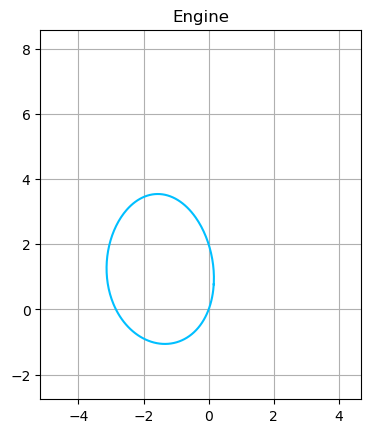

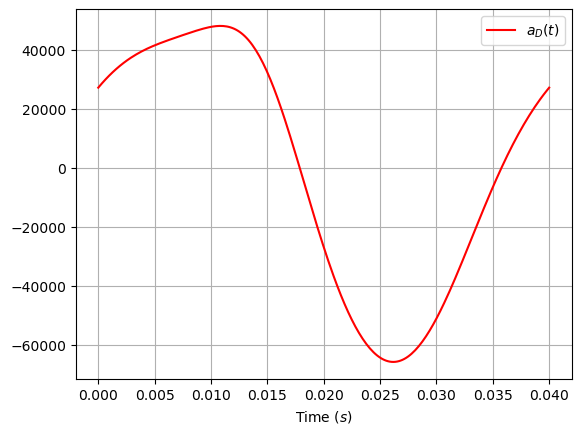

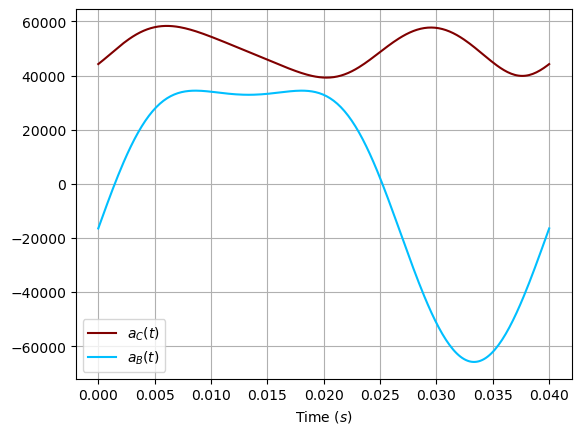

In [2]:
# This test just verifies that the directions of the velocity and acceleration makes sense.
# See to it that the figures match those from Homework 2
from mechanism import *
import numpy as np
import matplotlib.pyplot as plt

O, A, B, C, D = get_joints('O A B C D')
C.follow = True
a = Vector((O, A), r=2)
b = Vector((A, B), r=6)
x = Vector((O, B), theta=np.pi/3, style='dotted')
c = Vector((A, C), r=2)
y = Vector((C, D), r=5)
d = Vector((O, D), theta=2*np.pi/3, style='dotted')
e = Vector((C, B), r=6)


# 0: t3, 1: t4, 2: t5, 3: t6, 4: x, 5: d
def loops(t, inp):
    temp = np.zeros((3, 2))
    temp[0] = a(inp) + b(t[0]) - x(t[4])
    temp[1] = e(t[3]) - b(t[0]) + c(t[1])
    temp[2] = d(t[5]) - y(t[2]) - c(t[1]) - a(inp)
    return temp.flatten()


guess1 = np.concatenate((np.deg2rad([70, 160, 120, 60]), np.array([5, 5])))
guess2 = np.array([20*np.pi, 20*np.pi, 20*np.pi, 20*np.pi, 100, 100])
guess3 = np.array([100, 100, 100, 100, 100, 100])

# Testing the first iteration
# mechanism = Mechanism(vectors=(a, b, c, d, e, x, y), input_vector=a, guess=(guess1, guess2, guess3), pos=0,
#                       vel=-50*np.pi, acc=0, loops=loops)
# mechanism.calculate()
# mechanism.tables(position=True, velocity=True, acceleration=True)
# mechanism.plot(velocity=True, acceleration=True)

time = np.linspace(0, 0.04, 250)
t2_t = -50*np.pi*time
w2_t = -50*np.pi*np.ones(250)
a2_t = np.zeros(250)

mechanism = Mechanism(vectors=(a, b, c, d, e, x, y), origin=O, guess=(guess1, guess2, guess3), pos=t2_t,
                      vel=w2_t, acc=a2_t, loops=loops)
mechanism.iterate()
ani, fig, ax = mechanism.get_animation(velocity=True, acceleration=True, stamp=time, stamp_loc=(0.5, 0.9), cushion=0.5)

ax.set_title('Engine')

# ani.save('../animations/engine_wl.mp4', dpi=300)

# If interested at a certain point, access the Joint attributes.
fig2, ax2 = plt.subplots()
ax2.plot(time, d.acc.r_ddots, color='red', label=r'$a_D(t)$')

fig3, ax3 = plt.subplots()
ax3.plot(time, C.acc_mags, color='maroon', label=r'$a_C(t)$')
ax3.plot(time, x.acc.r_ddots, color='deepskyblue', label=r'$a_B(t)$')

for ax_ in [ax2, ax3]:
    ax_.grid()
    ax_.legend()
    ax_.set_xlabel('Time ($s$)')

plt.show()
ani.save('../animations/engine_wl.mp4', dpi=300)
